# Disentangled Variational Autoencoder Demo
This demo is based on the JointVAE framework and implementation by Emilien Dupont (2018) and showcases how the model found data-generative factors of various data inlcuding hand-written digits and fashion. It enables the user to get a touch and feel for how targeted data generation becomes possible with disentangled Variation Autoencoders (cf. Higgins et al. 2016).

In [1]:
# Imports
from visualization.visualizer import Visualizer
import matplotlib.pyplot as plt

/Users/jaabertr/Desktop/Uni/WF Artificial Intelligence/Abgabe Themenbereich 3/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


## Hand-written digit generation
VAE trained on MNIST, used for hand-written digit generation.

In [2]:
# Definition
path_mnist = './trained_models/mnist/'
viz_mnist = Visualizer(path_mnist)

In [3]:
viz_mnist.model

VAE(
  (img_to_features): Sequential(
    (0): Conv2d(1, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(64, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (5): ReLU()
  )
  (features_to_hidden): Sequential(
    (0): Linear(in_features=1024, out_features=256, bias=True)
    (1): ReLU()
  )
  (fc_mean): Linear(in_features=256, out_features=10, bias=True)
  (fc_log_var): Linear(in_features=256, out_features=10, bias=True)
  (fc_alphas): ModuleList(
    (0): Linear(in_features=256, out_features=10, bias=True)
  )
  (latent_to_features): Sequential(
    (0): Linear(in_features=20, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=1024, bias=True)
    (3): ReLU()
  )
  (features_to_img): Sequential(
    (0): ConvTranspose2d(64, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv

In [6]:
# Generate
continuous = [0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000, 0.0000,  1.0000,  0.0000,  0.0000]
discrete = [0, 0, 0, 0, 0, 0, 0, 3, 0, 0] # 3 for a good sharpness
img = viz_mnist.visualize(discrete_latent_parameters=discrete, continous_latent_parameters=continuous)

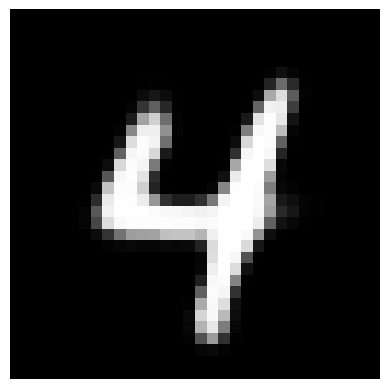

In [7]:
# Visualize
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

#### References
- Dupont, Emilien. "Learning disentangled joint continuous and discrete representations." Advances in neural information processing systems 31 (2018).
- JointVAE implementation: https://github.com/Schlumberger/joint-vae/tree/master, lastest retrieval 02nd Feb 2024
- Higgins, Irina, et al. "Early visual concept learning with unsupervised deep learning." arXiv preprint arXiv:1606.05579 (2016).